# Task 1: Preprocess and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

plt.style.use('seaborn-v0_8-whitegrid')

## Load the data

In [2]:
tsla_df = pd.read_csv('../data/TSLA.csv', header=0, skiprows=[1, 2], index_col=0, parse_dates=True)
bnd_df = pd.read_csv('../data/BND.csv', header=0, skiprows=[1, 2], index_col=0, parse_dates=True)
spy_df = pd.read_csv('../data/SPY.csv', header=0, skiprows=[1, 2], index_col=0, parse_dates=True)

In [3]:
tsla_df.head()

,Close,High,Low,Open,Volume
Price,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500


In [4]:
bnd_df.head()

,Close,High,Low,Open,Volume
Price,,,,,
2015-07-01,60.816696,60.914422,60.764074,60.794145,5399300
2015-07-02,60.967033,61.027175,60.936963,60.936963,1060100
2015-07-06,61.177563,61.222672,61.057285,61.222672,2210700
2015-07-07,61.237728,61.470769,61.237728,61.410634,4183200
2015-07-08,61.410622,61.463244,61.312890,61.373032,1967800


In [5]:
spy_df.head()

,Close,High,Low,Open,Volume
Price,,,,,
2015-07-01,174.917114,175.363889,174.124717,175.110995,135979900
2015-07-02,174.756927,175.566188,174.335441,175.397596,104373700
2015-07-06,174.259644,175.043603,173.256502,173.458821,117975400
2015-07-07,175.355408,175.481849,172.059377,174.461858,173820200
2015-07-08,172.413452,174.293280,172.177420,174.006672,164020100


## Data Cleaning and Understanding

In [6]:
print("TSLA Data:")
print(tsla_df.info())
print(tsla_df.isnull().sum())

print("BND Data:")
print(bnd_df.info())
print(bnd_df.isnull().sum())

print("SPY Data:")
print(spy_df.info())
print(spy_df.isnull().sum())

TSLA Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2535 non-null   float64
 1   High    2535 non-null   float64
 2   Low     2535 non-null   float64
 3   Open    2535 non-null   float64
 4   Volume  2535 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.8 KB
None
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
BND Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2535 non-null   float64
 1   High    2535 non-null   float64
 2   Low     2535 non-null   float64
 3   Open    2535 non-null   float64
 4   Volume  2535 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.8 KB
None
Close     0
High      0
Lo

There are no missing values in the datasets. Now let's look at the basic statistics.

In [7]:
print("TSLA Basic Stats:")
print(tsla_df.describe())

TSLA Basic Stats:
             Close         High          Low         Open        Volume
count  2535.000000  2535.000000  2535.000000  2535.000000  2.535000e+03
mean    131.963002   134.960429   128.837831   132.000600  1.141789e+08
std     120.914904   123.783736   117.996631   121.034152  7.332146e+07
min       9.578000    10.331333     9.403333     9.488000  1.062000e+07
25%      18.967667    19.279667    18.575334    18.901000  6.908220e+07
50%      94.571335    97.666664    91.734001    94.400665  9.537450e+07
75%     236.761665   240.881668   232.170006   235.851669  1.322551e+08
max     479.859985   488.540009   457.510010   475.899994  9.140820e+08


In [8]:
print("BND Basic Stats:")
print(bnd_df.describe())

BND Basic Stats:
             Close         High          Low         Open        Volume
count  2535.000000  2535.000000  2535.000000  2535.000000  2.535000e+03
mean     68.469189    68.571175    68.364920    68.471392  4.434376e+06
std       4.554601     4.563590     4.544724     4.555994  2.899511e+06
min      60.779163    60.899446    60.764074    60.786682  0.000000e+00
25%      64.654362    64.731250    64.570656    64.660605  2.182050e+06
50%      67.604927    67.749353    67.474080    67.589081  4.121100e+06
75%      71.891129    72.018939    71.780696    71.886204  5.890100e+06
max      77.318253    77.413291    77.283688    77.378734  3.396300e+07


In [9]:
print("SPY Basic Stats:")
print(spy_df.describe())

SPY Basic Stats:
             Close         High          Low         Open        Volume
count  2535.000000  2535.000000  2535.000000  2535.000000  2.535000e+03
mean    334.193733   335.981619   332.114636   334.125538  8.503521e+07
std     126.427705   127.053090   125.661287   126.391139  4.428796e+07
min     155.869781   156.926762   153.758426   155.426530  2.027000e+07
25%     230.083199   234.024909   228.661741   231.007825  5.779150e+07
50%     305.264465   306.143549   302.033069   304.714921  7.451530e+07
75%     420.350525   423.114851   417.754441   420.117481  9.789180e+07
max     637.099976   638.669983   635.539978   638.349976  5.072443e+08


## Exploratory Data Analysis (EDA)

### Closing Price Over Time

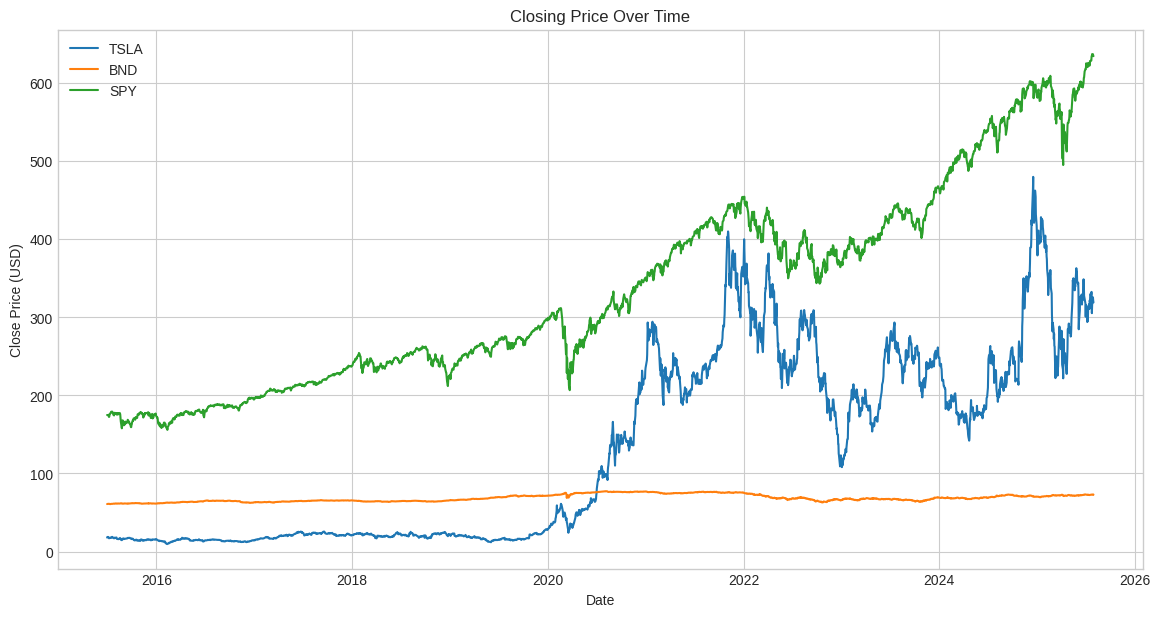

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(tsla_df['Close'], label='TSLA')
plt.plot(bnd_df['Close'], label='BND')
plt.plot(spy_df['Close'], label='SPY')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

### Daily Percentage Change

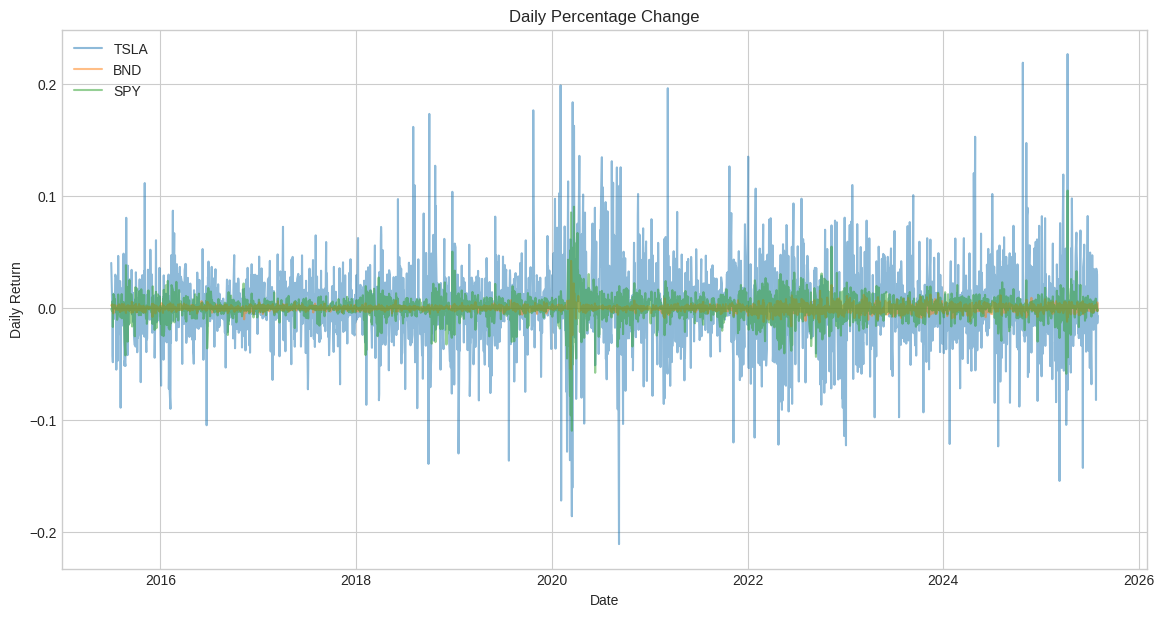

In [11]:
tsla_df['Daily Return'] = tsla_df['Close'].pct_change()
bnd_df['Daily Return'] = bnd_df['Close'].pct_change()
spy_df['Daily Return'] = spy_df['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(tsla_df['Daily Return'], label='TSLA', alpha=0.5)
plt.plot(bnd_df['Daily Return'], label='BND', alpha=0.5)
plt.plot(spy_df['Daily Return'], label='SPY', alpha=0.5)
plt.title('Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

### Volatility Analysis (Rolling Mean and Standard Deviation)

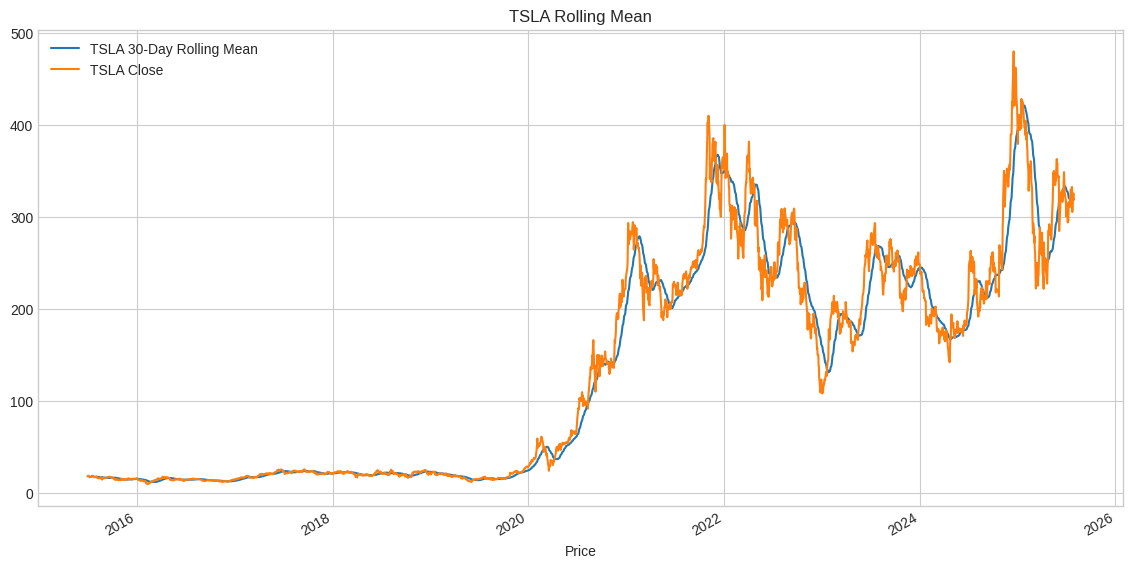

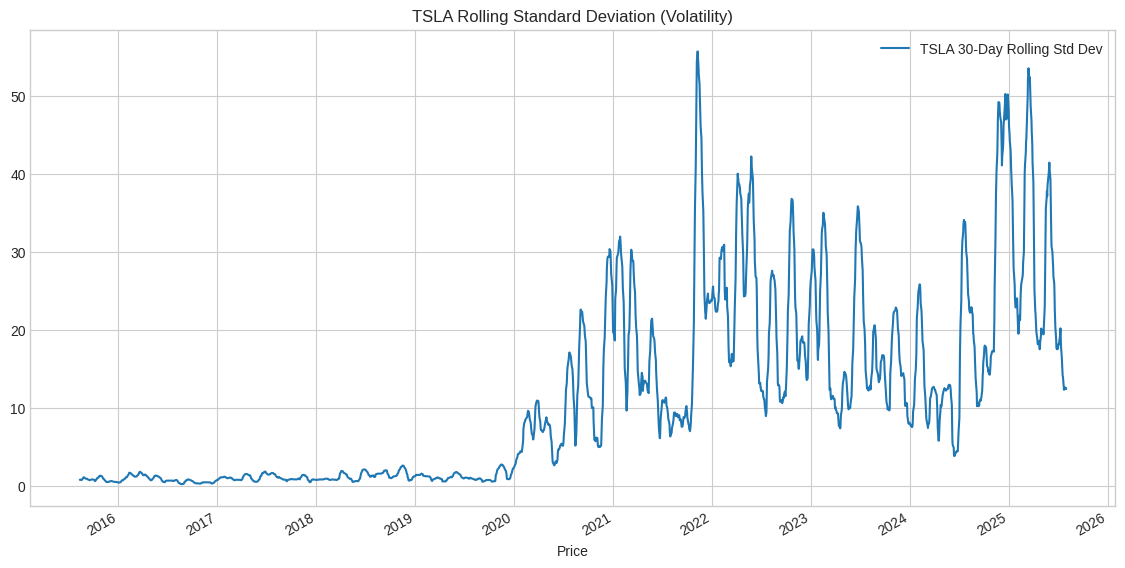

In [12]:
plt.figure(figsize=(14, 7))
tsla_df['Close'].rolling(window=30).mean().plot(label='TSLA 30-Day Rolling Mean')
tsla_df['Close'].plot(label='TSLA Close')
plt.title('TSLA Rolling Mean')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
tsla_df['Close'].rolling(window=30).std().plot(label='TSLA 30-Day Rolling Std Dev')
plt.title('TSLA Rolling Standard Deviation (Volatility)')
plt.legend()
plt.show()

## Stationarity Test (Augmented Dickey-Fuller)

In [13]:
def adf_test(series, name=''):
    result = adfuller(series.dropna())
    print(f'ADF Test for {name}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is likely stationary.")
    else:
        print("Fail to reject the null hypothesis. Data is likely non-stationary.")

adf_test(tsla_df['Close'], 'TSLA Close')
print('---')
adf_test(tsla_df['Daily Return'], 'TSLA Daily Return')

ADF Test for TSLA Close
ADF Statistic: -1.4188720053968291
p-value: 0.5731959514207213
Critical Value (1%): -3.4329610922579095
Critical Value (5%): -2.8626935681060375
Critical Value (10%): -2.567384088736619
Fail to reject the null hypothesis. Data is likely non-stationary.
---
ADF Test for TSLA Daily Return
ADF Statistic: -34.68109047254189
p-value: 0.0
Critical Value (1%): -3.4329352851231945
Critical Value (5%): -2.862682171580326
Critical Value (10%): -2.5673780210899224
Reject the null hypothesis. Data is likely stationary.


## Risk Metrics

### Value at Risk (VaR)

In [14]:
confidence_level = 0.95
var_95 = tsla_df['Daily Return'].quantile(1 - confidence_level)
print(f'Value at Risk (95% confidence): {var_95:.2%}')

Value at Risk (95% confidence): -5.47%


### Sharpe Ratio

In [15]:
risk_free_rate = 0.02  # Assuming a 2% risk-free rate
mean_return = tsla_df['Daily Return'].mean()
std_dev = tsla_df['Daily Return'].std()
sharpe_ratio = (mean_return * 252 - risk_free_rate) / (std_dev * np.sqrt(252)) # Annualized
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

Sharpe Ratio: 0.74
